<a href="https://colab.research.google.com/github/KornelWitkowski/TensorFlow-benchmarks/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification

## Fashion MNIST

### Data preparation 

In [325]:
import os
import tensorflow as tf

from tensorflow.keras import datasets

In [329]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

len(train_images), len(test_images)

(60000, 10000)

In [330]:
class_names = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

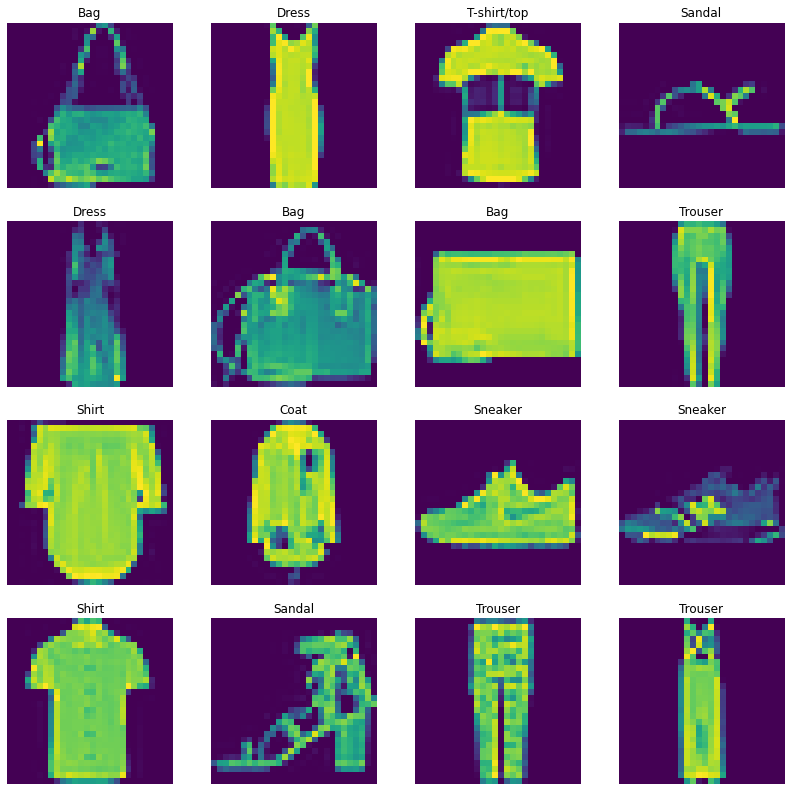

In [332]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4,4, figsize=(14,14))

for i in range(16):
    j = np.random.randint(60000)
    axs[i//4, i%4].imshow(train_images[j])
    axs[i//4, i%4].set_title(class_names[train_labels[j]])
    axs[i//4, i%4].axis("off")

### Model & Traning

In [264]:
def create_model_checkpoint(model_name, save_path="best_models"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              monitor="val_accuracy",
                                              verbose=0,
                                              save_best_only=True)


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                 factor=0.1,
                                                 patience=3,
                                                 verbose=1)

In [351]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Rescaling, Reshape, Dropout
from tensorflow.keras import Sequential

model = Sequential(name="model_mnist")
model.add(Rescaling(1/255.0))
model.add(Reshape((28, 28, 1)))
model.add(Conv2D(4, (2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [352]:
history = model.fit(x=train_images,
                    y=train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=30,
                    callbacks=[reduce_lr, create_model_checkpoint(model.name) ])

Epoch 1/30
1863/1875 [============================>.] - ETA: 0s - loss: 0.5568 - accuracy: 0.7970INFO:tensorflow:Assets written to: best_models/model_mnist/assets


INFO:tensorflow:Assets written to: best_models/model_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.5557 - accuracy: 0.7975 - val_loss: 0.4002 - val_accuracy: 0.8535 - lr: 0.0010
Epoch 2/30
1872/1875 [============================>.] - ETA: 0s - loss: 0.4122 - accuracy: 0.8478INFO:tensorflow:Assets written to: best_models/model_mnist/assets


INFO:tensorflow:Assets written to: best_models/model_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.4122 - accuracy: 0.8479 - val_loss: 0.3576 - val_accuracy: 0.8688 - lr: 0.0010
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3753 - accuracy: 0.8602 - val_loss: 0.3492 - val_accuracy: 0.8684 - lr: 0.0010
Epoch 4/30
1866/1875 [============================>.] - ETA: 0s - loss: 0.3514 - accuracy: 0.8679INFO:tensorflow:Assets written to: best_models/model_mnist/assets


INFO:tensorflow:Assets written to: best_models/model_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.3517 - accuracy: 0.8677 - val_loss: 0.3184 - val_accuracy: 0.8798 - lr: 0.0010
Epoch 5/30
1862/1875 [============================>.] - ETA: 0s - loss: 0.3365 - accuracy: 0.8749INFO:tensorflow:Assets written to: best_models/model_mnist/assets


INFO:tensorflow:Assets written to: best_models/model_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.3365 - accuracy: 0.8749 - val_loss: 0.3110 - val_accuracy: 0.8829 - lr: 0.0010
Epoch 6/30
1868/1875 [============================>.] - ETA: 0s - loss: 0.3211 - accuracy: 0.8788INFO:tensorflow:Assets written to: best_models/model_mnist/assets


INFO:tensorflow:Assets written to: best_models/model_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.3212 - accuracy: 0.8788 - val_loss: 0.3091 - val_accuracy: 0.8837 - lr: 0.0010
Epoch 7/30
1859/1875 [============================>.] - ETA: 0s - loss: 0.3123 - accuracy: 0.8830INFO:tensorflow:Assets written to: best_models/model_mnist/assets


INFO:tensorflow:Assets written to: best_models/model_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.3123 - accuracy: 0.8830 - val_loss: 0.3049 - val_accuracy: 0.8849 - lr: 0.0010
Epoch 8/30
1861/1875 [============================>.] - ETA: 0s - loss: 0.3031 - accuracy: 0.8863INFO:tensorflow:Assets written to: best_models/model_mnist/assets


INFO:tensorflow:Assets written to: best_models/model_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.3034 - accuracy: 0.8863 - val_loss: 0.2923 - val_accuracy: 0.8908 - lr: 0.0010
Epoch 9/30
1868/1875 [============================>.] - ETA: 0s - loss: 0.2942 - accuracy: 0.8894INFO:tensorflow:Assets written to: best_models/model_mnist/assets


INFO:tensorflow:Assets written to: best_models/model_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.2944 - accuracy: 0.8894 - val_loss: 0.2833 - val_accuracy: 0.8940 - lr: 0.0010
Epoch 10/30
1862/1875 [============================>.] - ETA: 0s - loss: 0.2851 - accuracy: 0.8937INFO:tensorflow:Assets written to: best_models/model_mnist/assets


INFO:tensorflow:Assets written to: best_models/model_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.2848 - accuracy: 0.8938 - val_loss: 0.2816 - val_accuracy: 0.8970 - lr: 0.0010
Epoch 11/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2805 - accuracy: 0.8944 - val_loss: 0.2810 - val_accuracy: 0.8965 - lr: 0.0010
Epoch 12/30
1873/1875 [============================>.] - ETA: 0s - loss: 0.2749 - accuracy: 0.8970INFO:tensorflow:Assets written to: best_models/model_mnist/assets


INFO:tensorflow:Assets written to: best_models/model_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.2748 - accuracy: 0.8970 - val_loss: 0.2775 - val_accuracy: 0.8976 - lr: 0.0010
Epoch 13/30
1868/1875 [============================>.] - ETA: 0s - loss: 0.2696 - accuracy: 0.8984INFO:tensorflow:Assets written to: best_models/model_mnist/assets


INFO:tensorflow:Assets written to: best_models/model_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.2694 - accuracy: 0.8985 - val_loss: 0.2744 - val_accuracy: 0.8982 - lr: 0.0010
Epoch 14/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2657 - accuracy: 0.8992 - val_loss: 0.2762 - val_accuracy: 0.8970 - lr: 0.0010
Epoch 15/30
1872/1875 [============================>.] - ETA: 0s - loss: 0.2618 - accuracy: 0.9015INFO:tensorflow:Assets written to: best_models/model_mnist/assets


INFO:tensorflow:Assets written to: best_models/model_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.2616 - accuracy: 0.9016 - val_loss: 0.2680 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 16/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2536 - accuracy: 0.9043 - val_loss: 0.2694 - val_accuracy: 0.8998 - lr: 0.0010
Epoch 17/30
1864/1875 [============================>.] - ETA: 0s - loss: 0.2527 - accuracy: 0.9051
Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2527 - accuracy: 0.9050 - val_loss: 0.2791 - val_accuracy: 0.8985 - lr: 0.0010
Epoch 18/30
1864/1875 [============================>.] - ETA: 0s - loss: 0.2350 - accuracy: 0.9106INFO:tensorflow:Assets written to: best_models/model_mnist/assets


INFO:tensorflow:Assets written to: best_models/model_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.2351 - accuracy: 0.9106 - val_loss: 0.2651 - val_accuracy: 0.9025 - lr: 5.0000e-04
Epoch 19/30
1860/1875 [============================>.] - ETA: 0s - loss: 0.2356 - accuracy: 0.9106INFO:tensorflow:Assets written to: best_models/model_mnist/assets


INFO:tensorflow:Assets written to: best_models/model_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.2357 - accuracy: 0.9106 - val_loss: 0.2588 - val_accuracy: 0.9040 - lr: 5.0000e-04
Epoch 20/30
1860/1875 [============================>.] - ETA: 0s - loss: 0.2289 - accuracy: 0.9149INFO:tensorflow:Assets written to: best_models/model_mnist/assets


INFO:tensorflow:Assets written to: best_models/model_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.2290 - accuracy: 0.9150 - val_loss: 0.2588 - val_accuracy: 0.9052 - lr: 5.0000e-04
Epoch 21/30
1867/1875 [============================>.] - ETA: 0s - loss: 0.2256 - accuracy: 0.9142
Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2257 - accuracy: 0.9141 - val_loss: 0.2611 - val_accuracy: 0.9049 - lr: 5.0000e-04
Epoch 22/30
1872/1875 [============================>.] - ETA: 0s - loss: 0.2178 - accuracy: 0.9183INFO:tensorflow:Assets written to: best_models/model_mnist/assets


INFO:tensorflow:Assets written to: best_models/model_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.2177 - accuracy: 0.9184 - val_loss: 0.2558 - val_accuracy: 0.9062 - lr: 2.5000e-04
Epoch 23/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2177 - accuracy: 0.9174 - val_loss: 0.2564 - val_accuracy: 0.9062 - lr: 2.5000e-04
Epoch 24/30
1867/1875 [============================>.] - ETA: 0s - loss: 0.2156 - accuracy: 0.9176INFO:tensorflow:Assets written to: best_models/model_mnist/assets


INFO:tensorflow:Assets written to: best_models/model_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.2156 - accuracy: 0.9177 - val_loss: 0.2542 - val_accuracy: 0.9073 - lr: 2.5000e-04
Epoch 25/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2144 - accuracy: 0.9190 - val_loss: 0.2549 - val_accuracy: 0.9065 - lr: 2.5000e-04
Epoch 26/30
1875/1875 [==============================] - ETA: 0s - loss: 0.2139 - accuracy: 0.9192
Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
INFO:tensorflow:Assets written to: best_models/model_mnist/assets


INFO:tensorflow:Assets written to: best_models/model_mnist/assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.2139 - accuracy: 0.9192 - val_loss: 0.2551 - val_accuracy: 0.9086 - lr: 2.5000e-04
Epoch 27/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2085 - accuracy: 0.9222 - val_loss: 0.2532 - val_accuracy: 0.9069 - lr: 1.2500e-04
Epoch 28/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2087 - accuracy: 0.9209 - val_loss: 0.2532 - val_accuracy: 0.9072 - lr: 1.2500e-04
Epoch 29/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2069 - accuracy: 0.9220 - val_loss: 0.2524 - val_accuracy: 0.9084 - lr: 1.2500e-04
Epoch 30/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2069 - accuracy: 0.9215 - val_loss: 0.2526 - val_accuracy: 0.9067 - lr: 1.2500e-04


### Results 

In [353]:
model_best = tf.keras.models.load_model(f"best_models/{model.name}")

_, train_acc = model_best.evaluate(train_images, train_labels)
_, test_acc = model_best.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2551 - accuracy: 0.9086


In [359]:
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 0.9520166516304016
Test accuracy: 0.9085999727249146


In [357]:
def predict_class(model, test_images, test_labels):

  rand_int = np.random.randint(len(test_images))

  pred = model.predict(tf.expand_dims(test_images[rand_int], axis=0))
  pred_class = pred.argmax()

  fig,axs = plt.subplots(1, 2, figsize=(13,7))

  axs[0].imshow(test_images[rand_int])
  axs[0].axis("off")
  axs[0].set_title(f"True label: {class_names[test_labels[rand_int]]},    Predicted label: {class_names[pred_class]}")

  axs[1].bar(list(class_names.values()), pred[0])
  axs[1].grid(True)
  axs[1].set_ylim([-0.03,1.03])
  axs[1].set_xticklabels(list(class_names.values()), rotation=45)

In [355]:
pred = model_best.predict(train_images)

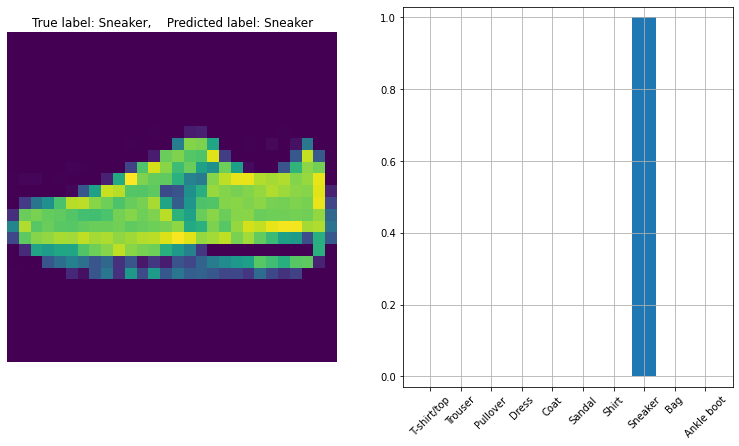

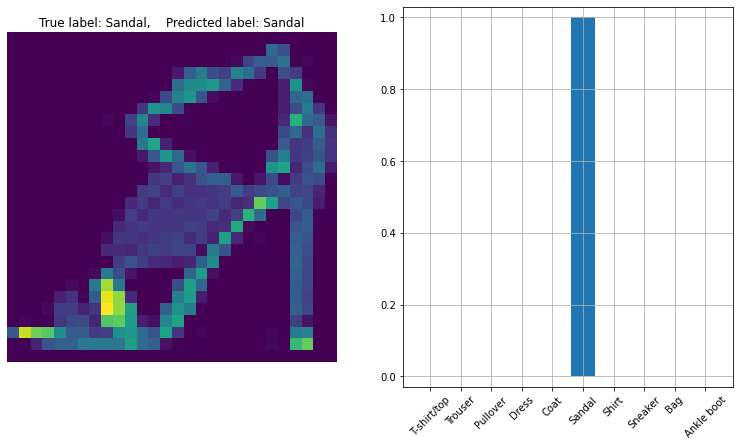

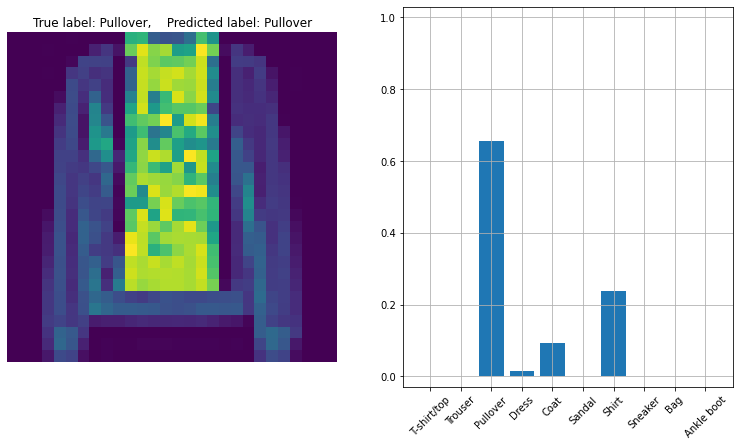

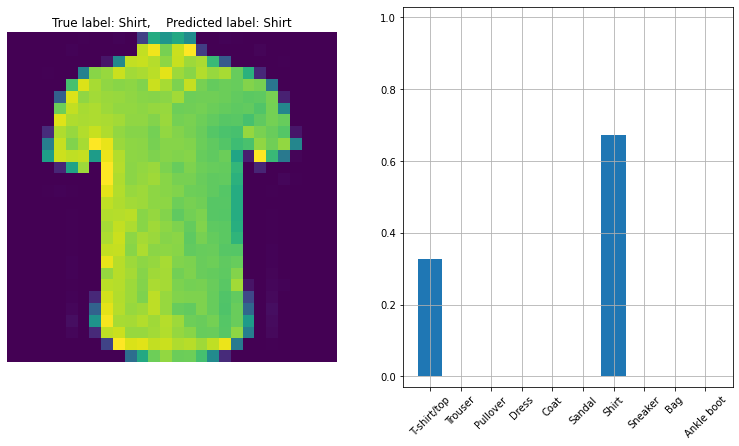

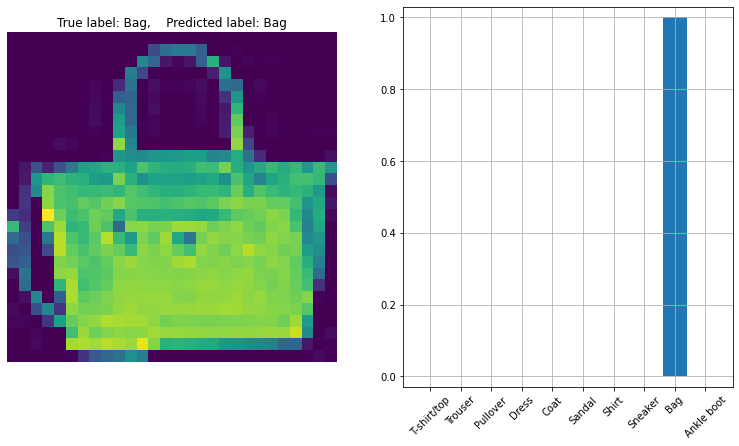

In [358]:
for i in range(5):
  predict_class(model, test_images, test_labels)

## horses_or_humans

### Data preparation

In [280]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [281]:
(train_data, test_data), ds_info = tfds.load(name="horses_or_humans",
                                             split=["train", "test"],
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info=True)

ds_info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    version=3.0.0,
    description='A large set of images of horses and humans.',
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1283,
    splits={
        'test': 256,
        'train': 1027,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
    redistribution_info=,
)

In [282]:
len(train_data), len(test_data)

(1027, 256)

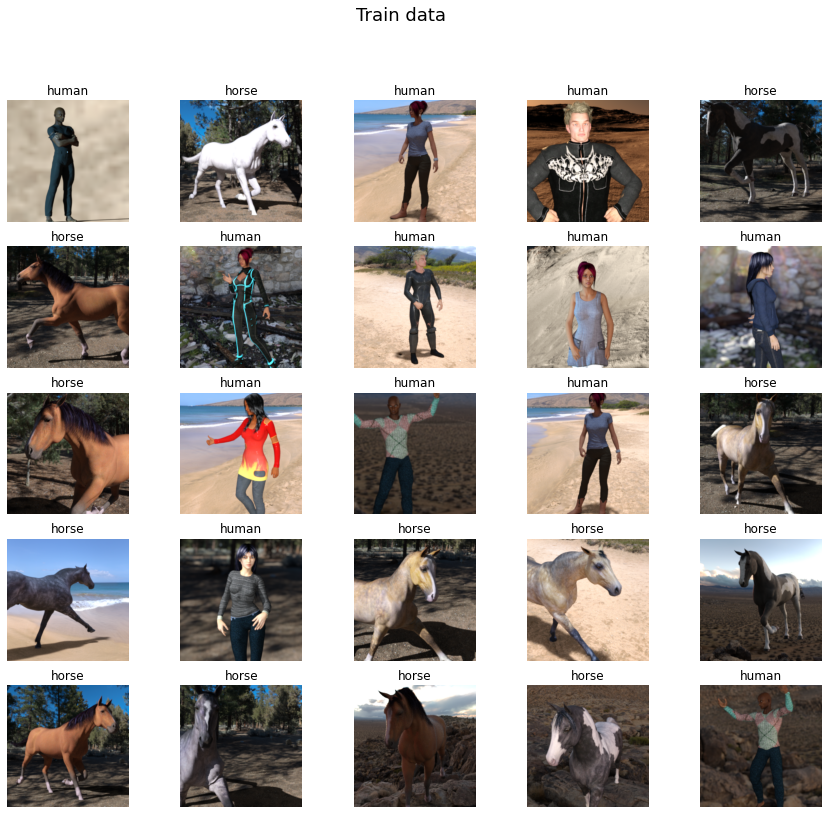

In [283]:
import matplotlib.pyplot as plt

class_names = ["horse", "human"]

fig, axs = plt.subplots(5, 5, figsize=(15, 13))
fig.suptitle('Train data', fontsize=18)

for i, (image, label) in enumerate(train_data.take(25)):
  axs[i//5, i%5].imshow(image)
  axs[i//5, i%5].set_title(f"{class_names[label]}")
  axs[i//5, i%5].axis("off")

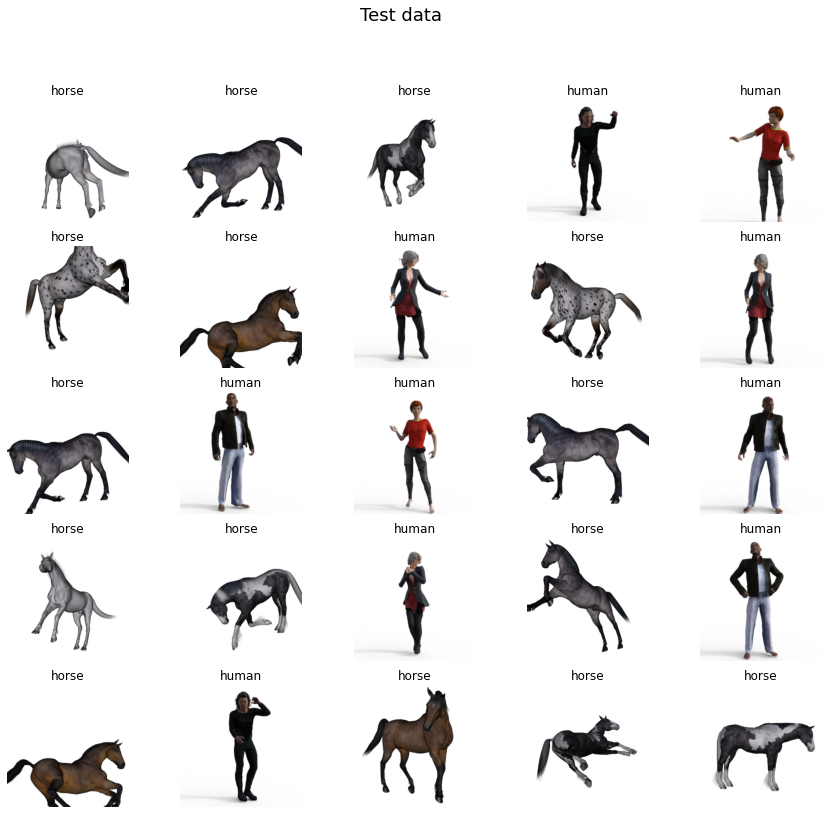

In [284]:
fig, axs = plt.subplots(5, 5, figsize=(15, 13))
fig.suptitle('Test data', fontsize=18)

for i, (image, label) in enumerate(test_data.take(25)):
  axs[i//5, i%5].imshow(image)
  axs[i//5, i%5].set_title(f"{class_names[label]}")
  axs[i//5, i%5].axis("off")

In [286]:
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

### Model & Training

In [287]:
import os

def create_model_checkpoint(model_name, save_path="best_models"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            monitor="val_accuracy",
                                            save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.5,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)      

In [288]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling, Dropout

model = Sequential([Rescaling(1/255.0),
                    Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
                    MaxPooling2D(2, 2),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    tf.keras.layers.Flatten(),
                    Dropout(0.3),
                    tf.keras.layers.Dense(512, activation='relu'),
                    Dropout(0.3),
                    Dense(128),
                    Dense(1, activation="sigmoid")
], name="model_humans_and_horses")

model.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history = model.fit(train_data,
                    epochs=20,
                    validation_steps=2,
                    validation_data=test_data,
                    callbacks=[reduce_lr, create_model_checkpoint(model.name)])

Epoch 1/20
32/33 [============================>.] - ETA: 0s - loss: 0.4387 - accuracy: 0.7539INFO:tensorflow:Assets written to: best_models/model_humans_and_horses/assets


INFO:tensorflow:Assets written to: best_models/model_humans_and_horses/assets


33/33 [==============================] - 8s 113ms/step - loss: 0.4378 - accuracy: 0.7546 - val_loss: 1.2134 - val_accuracy: 0.7969 - lr: 0.0010
Epoch 2/20
33/33 [==============================] - ETA: 0s - loss: 0.1228 - accuracy: 0.9503INFO:tensorflow:Assets written to: best_models/model_humans_and_horses/assets


INFO:tensorflow:Assets written to: best_models/model_humans_and_horses/assets


33/33 [==============================] - 7s 101ms/step - loss: 0.1228 - accuracy: 0.9503 - val_loss: 0.5612 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 3/20
33/33 [==============================] - 5s 52ms/step - loss: 0.0811 - accuracy: 0.9737 - val_loss: 0.5644 - val_accuracy: 0.8594 - lr: 0.0010
Epoch 4/20
33/33 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9893
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
33/33 [==============================] - 5s 53ms/step - loss: 0.0422 - accuracy: 0.9893 - val_loss: 3.1274 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 5/20
33/33 [==============================] - 6s 57ms/step - loss: 0.0395 - accuracy: 0.9844 - val_loss: 1.2617 - val_accuracy: 0.8750 - lr: 5.0000e-04
Epoch 6/20
33/33 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 0.9961
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
33/33 [==============================] - 5s 54ms/step - loss:

### Results

In [289]:
model_best = tf.keras.models.load_model(f"best_models/{model.name}")

_, train_acc = model_best.evaluate(train_data)
_, test_acc = model_best.evaluate(test_data)

8/8 [==============================] - 1s 64ms/step - loss: 1.0056 - accuracy: 0.8750


In [290]:
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 0.957156777381897
Test accuracy: 0.875


## rock_paper_scissors

In [ ]:
import tensorflow_datasets as tfds

(train_dataset, test_dataset), ds_info = tfds.load(name='rock_paper_scissors',
                                                   data_dir='tmp',
                                                   as_supervised=True,
                                                   with_info=True,
                                                   split=[tfds.Split.TRAIN, tfds.Split.TEST] )

In [48]:
ds_info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

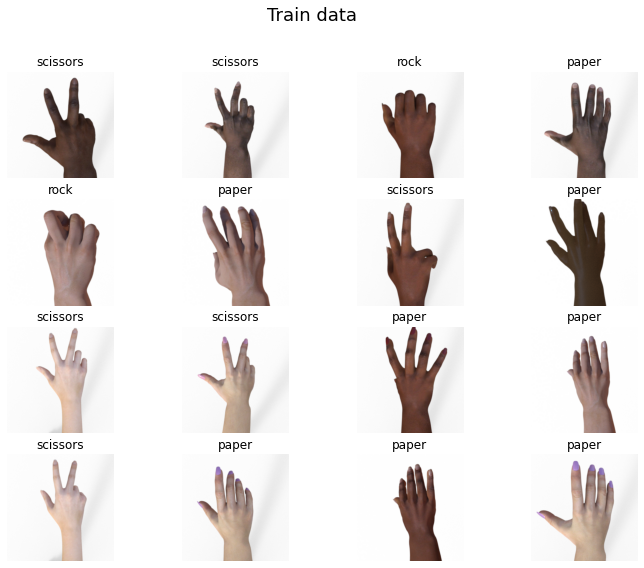

In [55]:
from matplotlib import axes
import matplotlib.pyplot as plt

class_names = ["rock", "paper", "scissors"]

fig, axs = plt.subplots(4, 4, figsize=(12, 9))
fig.suptitle('Train data', fontsize=18)

for i, (image, label) in enumerate(train_dataset.take(16)):

  axs[i//4, i%4].imshow(image)
  axs[i//4, i%4].set_title(f"{class_names[label]}")
  axs[i//4, i%4].axis("off")

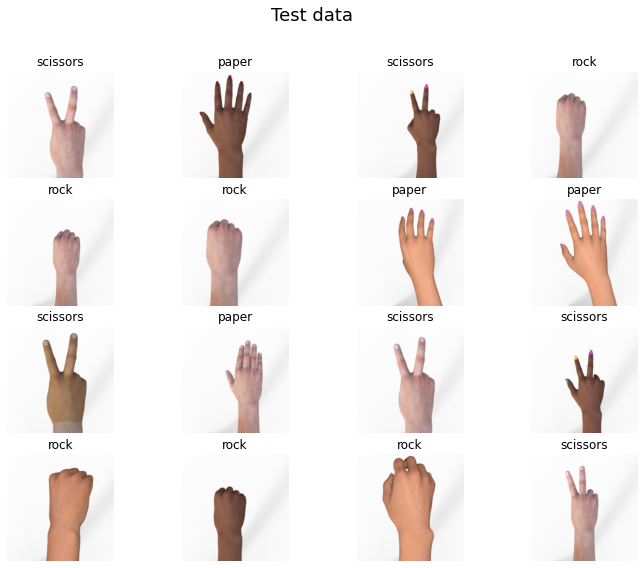

In [56]:
fig, axs = plt.subplots(4, 4, figsize=(12, 9))
fig.suptitle('Test data', fontsize=18)

for i, (image, label) in enumerate(test_dataset.take(16)):

  axs[i//4, i%4].imshow(image)
  axs[i//4, i%4].set_title(f"{class_names[label]}")
  axs[i//4, i%4].axis("off")

In [64]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomTranslation

data_augmentation = tf.keras.Sequential([RandomFlip("horizontal"),
                                        RandomRotation(0.05),
                                        RandomZoom(0.05),
                                        RandomTranslation(0.05, 0.05)])

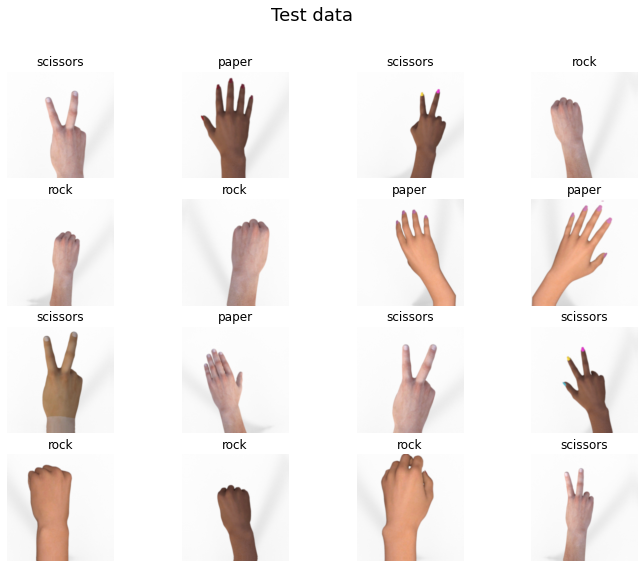

In [65]:
fig, axs = plt.subplots(4, 4, figsize=(12, 9))
fig.suptitle('Test data', fontsize=18)

for i, (image, label) in enumerate(test_dataset.take(16)):
  aug_image = data_augmentation(image, training=True)
  axs[i//4, i%4].imshow(aug_image/255.0)
  axs[i//4, i%4].set_title(f"{class_names[label]}")
  axs[i//4, i%4].axis("off")

In [66]:
import tensorflow as tf

train_data = train_dataset.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [71]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling

model = Sequential([  Rescaling(1/255.0),
                      Conv2D(filters=64, kernel_size=4, input_shape=(300, 300, 3)),
                      MaxPooling2D(pool_size=2, strides=2),
                      Conv2D(filters=64, kernel_size=4),
                      MaxPooling2D(pool_size=2, strides=2),
                      Conv2D(128, 3, activation="relu"),
                      MaxPooling2D(pool_size=2),
                      Conv2D(128, 3, activation="relu"),
                      MaxPooling2D(pool_size=2),
                      Flatten(),
                      Dropout(0.2),
                      Dense(256, activation="relu"),
                      Dropout(0.2),
                      Dense(3, activation="softmax")
], name="model_RPS")

model.compile(loss="sparse_categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history = model.fit(train_data,
                    epochs=20,
                    validation_data=test_data,
                    callbacks=[reduce_lr, create_model_checkpoint(model.name)])

Epoch 1/20
79/79 [==============================] - 1032s 13s/step - loss: 0.8668 - accuracy: 0.7460 - val_loss: 0.4666 - val_accuracy: 0.8172 - lr: 0.0010
Epoch 2/20
79/79 [==============================] - 1023s 13s/step - loss: 0.0470 - accuracy: 0.9849 - val_loss: 0.7829 - val_accuracy: 0.8118 - lr: 0.0010
Epoch 3/20
36/79 [============>.................] - ETA: 9:00 - loss: 0.0244 - accuracy: 0.9957

KeyboardInterrupt: ignored

## MNIST

### Data preparation

In [3]:
import tensorflow_datasets as tfds

mnist_data, info = tfds.load("mnist",
                              shuffle_files=True,
                              with_info=True,
                              as_supervised=True)

mnist_train, mnist_test = mnist_data["train"], mnist_data["test"]

len(mnist_train), len(mnist_test)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


(60000, 10000)

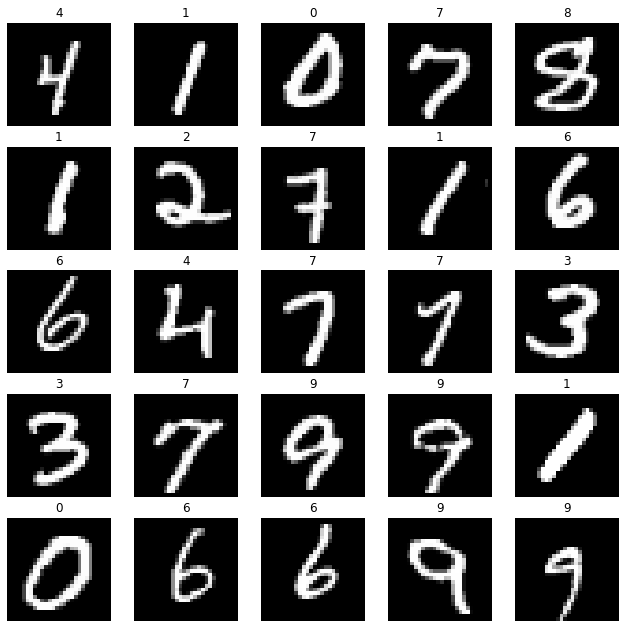

In [5]:
import numpy as np
import matplotlib.pyplot as plt


train_images = np.asarray([image for image, label in mnist_train])
train_labels = np.asarray([label for image, label in mnist_train])

N = 5

fig, ax = plt.subplots(5,5, figsize=(11,11))

for i in range(N**2):
  image = train_images[i]
  label = train_labels[i]
  ax[i//N,i%N].imshow(tf.squeeze(image), cmap='gray')
  ax[i//N,i%N].axis(False)
  ax[i//N,i%N].set_title(str(label))

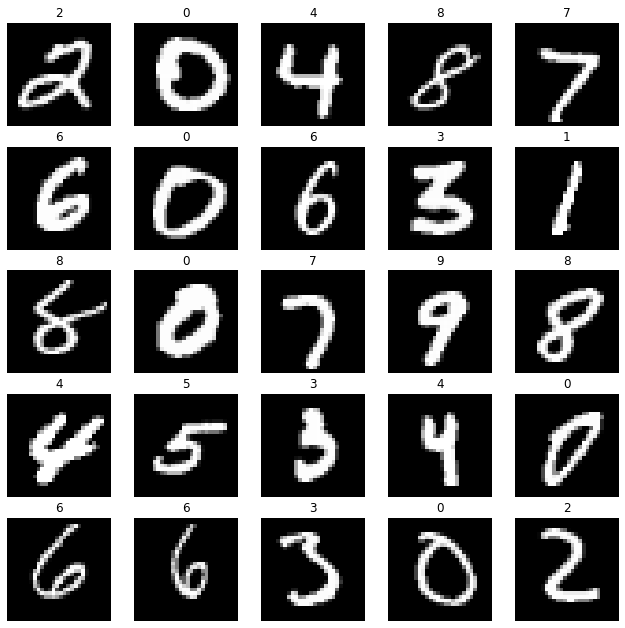

In [17]:
import matplotlib.pyplot as plt

test_images = np.asarray([image for image, label in mnist_test])
test_labels = np.asarray([label for image, label in mnist_test])

N = 5

fig, ax = plt.subplots(5,5, figsize=(11,11))

for i in range(N**2):
  image = test_images[i]
  label = test_labels[i]
  ax[i//N,i%N].imshow(tf.squeeze(image), cmap='gray')
  ax[i//N,i%N].axis(False)
  ax[i//N,i%N].set_title(str(label))

In [6]:
import tensorflow as tf

train_dataset = mnist_train.batch(128).prefetch(tf.data.AUTOTUNE)
test_dataset = mnist_test.batch(128).prefetch(tf.data.AUTOTUNE)

### Model & Traning

In [9]:
import os

def create_model_checkpoint(model_name, save_path="best_models"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              monitor="val_accuracy",
                                              verbose=0,
                                              save_best_only=True)


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                 factor=0.1,
                                                 patience=3,
                                                 verbose=1)

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Rescaling, Reshape, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


model = Sequential([Rescaling(1/255.0),
                    Reshape((28, 28, 1)),
                    Conv2D(4, (2, 2), activation='relu', input_shape=(28, 28, 1)), 
                    MaxPooling2D((2, 2)),
                    Flatten(),      
                    Dense(256, "relu"),
                    Dropout(0.2),
                    Dense(10, activation="softmax")], name="model_MNIST")

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

model.fit(train_dataset,
          epochs=30,
          steps_per_epoch=len(train_dataset),
          validation_data=test_dataset,
          callbacks=[reduce_lr, create_model_checkpoint(model.name)]
)

Epoch 1/30
469/469 [==============================] - 16s 32ms/step - loss: 0.3207 - accuracy: 0.9064 - val_loss: 0.1407 - val_accuracy: 0.9576 - lr: 0.0010
Epoch 2/30
469/469 [==============================] - 14s 30ms/step - loss: 0.1288 - accuracy: 0.9619 - val_loss: 0.0893 - val_accuracy: 0.9749 - lr: 0.0010
Epoch 3/30
469/469 [==============================] - 14s 31ms/step - loss: 0.0888 - accuracy: 0.9735 - val_loss: 0.0695 - val_accuracy: 0.9793 - lr: 0.0010
Epoch 4/30
469/469 [==============================] - 15s 32ms/step - loss: 0.0682 - accuracy: 0.9794 - val_loss: 0.0640 - val_accuracy: 0.9815 - lr: 0.0010
Epoch 5/30
469/469 [==============================] - 15s 33ms/step - loss: 0.0564 - accuracy: 0.9826 - val_loss: 0.0589 - val_accuracy: 0.9825 - lr: 0.0010
Epoch 6/30
469/469 [==============================] - 15s 31ms/step - loss: 0.0471 - accuracy: 0.9850 - val_loss: 0.0554 - val_accuracy: 0.9838 - lr: 0.0010
Epoch 7/30
469/469 [==============================] - 13s 

### Results

In [11]:
model_best = tf.keras.models.load_model(f"best_models/{model.name}")

_, train_acc = model_best.evaluate(train_dataset)
_, test_acc = model_best.evaluate(test_dataset)

79/79 [==============================] - 1s 14ms/step - loss: 0.0478 - accuracy: 0.9876


In [12]:
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 0.9992666840553284
Test accuracy: 0.9876000285148621


### The worst predictions

In [44]:
import pandas as pd

predictions = model_best.predict(test_dataset)
predictions_labels = tf.argmax(predictions, axis=1)

MAE = tf.metrics.MAE(predictions, tf.one_hot(test_labels, 10))

MAE_df = pd.DataFrame(MAE, columns=["MAE"])
MAE_df_sorted = MAE_df.sort_values("MAE", ascending=False)

In [45]:
worst_predictions_indices = MAE_df_sorted.index.to_list()[:25]

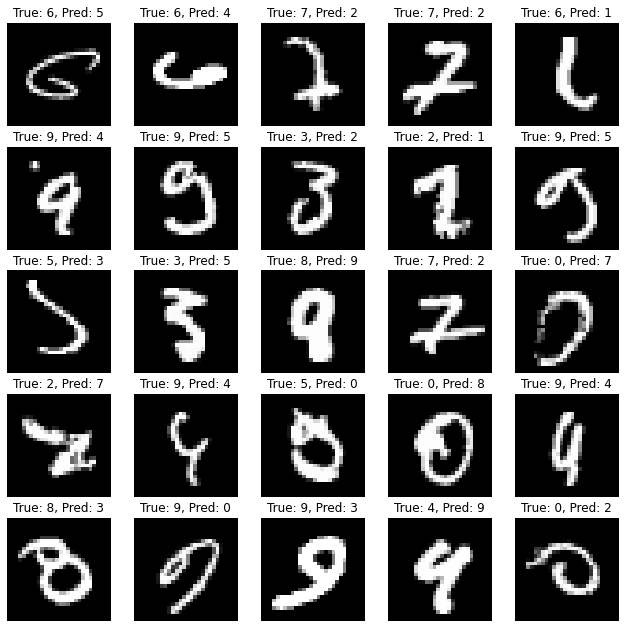

In [46]:
fig, ax = plt.subplots(5,5, figsize=(11,11))

for i, j in enumerate(worst_predictions_indices):
  image = test_images[j]
  true_label = test_labels[j]
  pred_label = predictions_labels[j]
  ax[i//N,i%N].imshow(tf.squeeze(image), cmap='gray')
  ax[i//N,i%N].axis(False)
  ax[i//N,i%N].set_title(f"True: {true_label}, Pred: {pred_label}")

## tf_flowers

In [1]:
import tensorflow_datasets as tfds

(training_set, validation_set), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)

In [2]:
class_names = ds_info.features['label'].names
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [3]:
for i, (image, label) in enumerate(training_set.take(5)):
    print(f"Image {i} shape: {image.shape} label: {class_names[label]}")

Image 0 shape: (333, 500, 3) label: tulips
Image 1 shape: (212, 320, 3) label: sunflowers
Image 2 shape: (240, 320, 3) label: sunflowers
Image 3 shape: (240, 320, 3) label: roses
Image 4 shape: (317, 500, 3) label: sunflowers


In [4]:
import tensorflow as tf
tf.reduce_min(image).numpy(), tf.reduce_max(image).numpy()

(0, 255)

In [6]:
from tensorflow.keras.layers import Rescaling, Resizing
from tensorflow.keras import Sequential

preprocessing_layer = Sequential([Resizing(256, 256),
                                  Rescaling(1/255.0)
                                  ], name="preprocessing_layer")

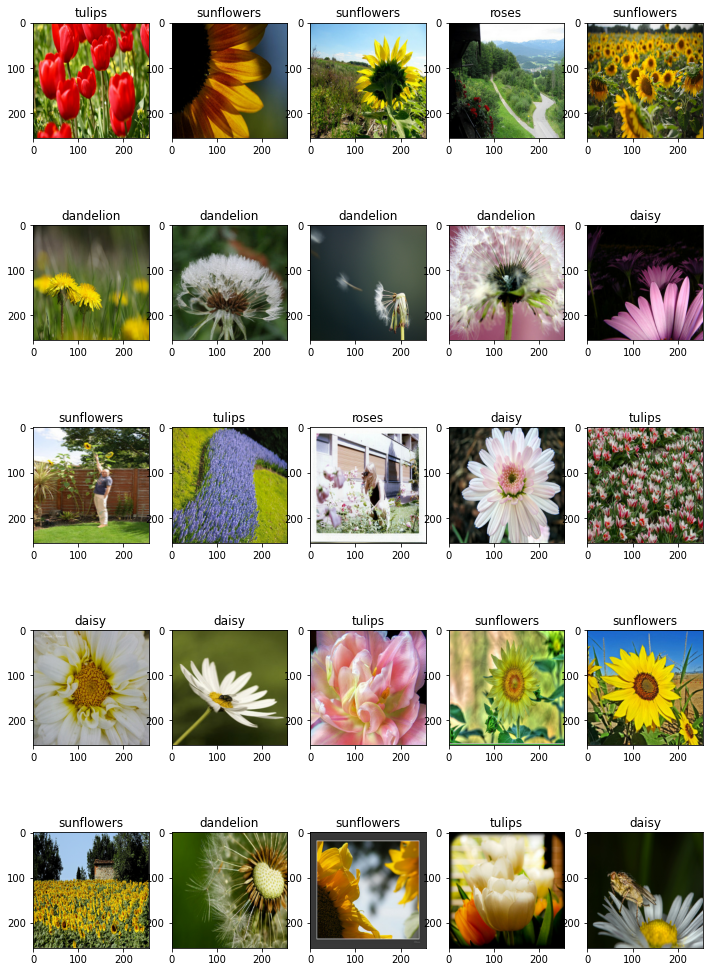

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 5, figsize=(12, 18))

for i, (image, label) in enumerate(training_set.take(25)):
    image = preprocessing_layer(image)
    axs[i//5, i%5].imshow(image)
    axs[i//5, i%5].set_title(class_names[label])

In [8]:
preprocess_img = lambda image, label: (preprocessing_layer(image), label)

train_data = training_set.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
test_data = validation_set.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)

train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [9]:
import os

def create_model_checkpoint(model_name, save_path="best_models"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            monitor="val_accuracy",
                                            save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.5,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7) 

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling, Dropout

model = Sequential([
                      Conv2D(filters=64, kernel_size=4, input_shape=(256, 256, 3)),
                      MaxPooling2D(pool_size=2, strides=2),
                      Conv2D(filters=64, kernel_size=4),
                      MaxPooling2D(pool_size=2, strides=2),
                      Conv2D(128, 3, activation="relu"),
                      MaxPooling2D(pool_size=2),
                      Conv2D(128, 3, activation="relu"),
                      MaxPooling2D(pool_size=2),
                      Flatten(),
                      Dropout(0.2),
                      Dense(256, activation="relu"),
                      Dropout(0.2),
                      Dense(5, activation="softmax")
], name="model_flowers")

model.compile(loss="sparse_categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history = model.fit(train_data,
                    epochs=6,
                    validation_data=test_data,
                    callbacks=[reduce_lr, create_model_checkpoint(model.name)])

Epoch 1/6
92/92 [==============================] - ETA: 0s - loss: 1.4549 - accuracy: 0.3634

INFO:tensorflow:Assets written to: best_models\model_flowers\assets


INFO:tensorflow:Assets written to: best_models\model_flowers\assets


92/92 [==============================] - 337s 4s/step - loss: 1.4549 - accuracy: 0.3634 - val_loss: 1.2775 - val_accuracy: 0.4673 - lr: 0.0010
Epoch 2/6
92/92 [==============================] - ETA: 0s - loss: 1.1781 - accuracy: 0.5140

INFO:tensorflow:Assets written to: best_models\model_flowers\assets


INFO:tensorflow:Assets written to: best_models\model_flowers\assets


92/92 [==============================] - 308s 3s/step - loss: 1.1781 - accuracy: 0.5140 - val_loss: 1.1434 - val_accuracy: 0.5409 - lr: 0.0010
Epoch 3/6
92/92 [==============================] - ETA: 0s - loss: 1.0572 - accuracy: 0.5855

INFO:tensorflow:Assets written to: best_models\model_flowers\assets


INFO:tensorflow:Assets written to: best_models\model_flowers\assets


92/92 [==============================] - 301s 3s/step - loss: 1.0572 - accuracy: 0.5855 - val_loss: 0.9761 - val_accuracy: 0.6076 - lr: 0.0010
Epoch 4/6
92/92 [==============================] - 302s 3s/step - loss: 0.9739 - accuracy: 0.6318 - val_loss: 1.0005 - val_accuracy: 0.5926 - lr: 0.0010
Epoch 5/6
92/92 [==============================] - ETA: 0s - loss: 0.8585 - accuracy: 0.6798

INFO:tensorflow:Assets written to: best_models\model_flowers\assets


INFO:tensorflow:Assets written to: best_models\model_flowers\assets


92/92 [==============================] - 308s 3s/step - loss: 0.8585 - accuracy: 0.6798 - val_loss: 0.9492 - val_accuracy: 0.6362 - lr: 0.0010
Epoch 6/6
92/92 [==============================] - 309s 3s/step - loss: 0.7364 - accuracy: 0.7282 - val_loss: 1.0428 - val_accuracy: 0.6294 - lr: 0.0010


### Results

In [12]:
model_best = tf.keras.models.load_model(f"best_models/{model.name}")

_, train_acc = model_best.evaluate(train_data)
_, test_acc = model_best.evaluate(test_data)

23/23 [==============================] - 21s 911ms/step - loss: 0.9492 - accuracy: 0.6362


In [13]:
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 0.7510218024253845
Test accuracy: 0.636239767074585
